In [1]:
print("Hello World")

Hello World


In [2]:
import pandas as pd
df = pd.read_csv("/Users/aponduga/Desktop/Personal/ML_DS/Project_Implementation/Emotion_Recognition_System/data/raw/tweet_emotions.csv")

df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [4]:
df.tail()

df.info()

df.describe()

df.shape

df.columns

df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB
tweet_id     0
sentiment    0
content      0
dtype: int64


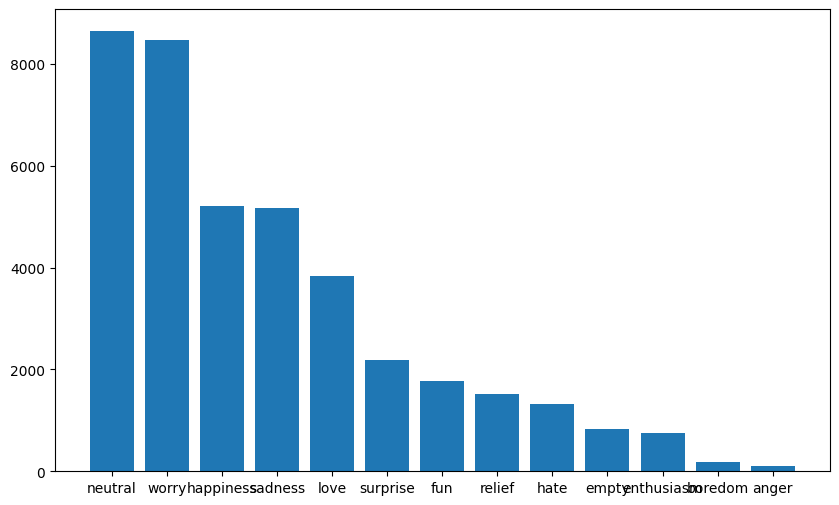

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df["sentiment"].value_counts().index, df["sentiment"].value_counts().values)
plt.show()


In [8]:
df.sentiment.value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

In [11]:
df.loc[df.sentiment == "sadness"]


,tweet_id,sentiment,content
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?
...,...,...,...
39882,1753887579,sadness,Heaps keen for next weekend. Mummy. &lt;3
39894,1753902385,sadness,@renagades Have a great day..... if the rain k...
39909,1753902771,sadness,@Ssisch Hmmm... Sisch &amp; sound design. So w...
39939,1753903509,sadness,@watermelon39 haha! And Twitter! Hard though i...
